In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mytorch.nn.activation import ReLU, Sigmoid, Tanh, LinearActivation
from mytorch.nn.initialization import Xavier, He
from mytorch.nn.linear import Linear
from mytorch.nn.loss import CrossEntropyLoss, L2Loss
from mytorch.optim.optimizer import SGD, Adam
from models.mlp import MLP
import numpyNN

In [2]:
# based on dataset.py from IML HW 6 
def one_hot_encoding(y, num_classes=2):
    one_hot = np.eye(num_classes)[y.astype(int).flatten()]
    return one_hot

In [3]:
def train_mlp(mlp, x_train, y_train, opt_loss, opt_optim, num_epoch=20):
    assert x_train.shape[0] == y_train.shape[0], "x_train and y_train must have the same length"


    train_loss = []  # List to store mean loss for each epoch
    train_accuracy = []  # List to store accuracy for each epoch

    y_train_encoded = one_hot_encoding(y_train)  # Assuming one_hot_encoding function is defined elsewhere

    index = np.arange(x_train.shape[0])

    for epoch in range(num_epoch):
        np.random.shuffle(index)
        train_data = x_train[index]
        train_labels = y_train_encoded[index]

        y_pred = mlp.forward(train_data)
        loss = opt_loss.forward(y_pred, train_labels)
        mean_loss = np.mean(loss)
        train_loss.append(mean_loss)

        predicted_labels = np.argmax(y_pred, axis=1)
        true_labels = np.argmax(train_labels, axis=1)

        accuracy = np.sum(predicted_labels == true_labels) / len(train_data)
        train_accuracy.append(accuracy)

        dLdZ = opt_loss.backward()
        mlp.backward(dLdZ)
        opt_optim.step()
        opt_optim.zero_grad()

        print(f"Epoch: {epoch}, Loss: {mean_loss}, Accuracy: {accuracy}")

    train_logs = {"train_loss": train_loss, "train_accuracy": train_accuracy}
    return train_logs


In [4]:
def test_mlp(mlp, x_test, y_test, opt_loss, num_epoch = 20):
    """
    Parameters
    ----------
    Returns
    -------
        [0] Mean test loss.
        [1] Test accuracy.
    """
    assert(x_test.shape[0] == y_test.shape[0]) # "x_test and y_test must have same length"
    
    test_loss = []
    test_accuracy = [ ]
    y_test = one_hot_encoding(y_test)

    for epoch in range(num_epoch):
        y_pred = mlp.forward(x_test)
        loss = opt_loss.forward(y_pred, y_test) 
        loss = np.mean(loss)
        test_loss.append(loss)
        
        predicted_labels = np.argmax(y_pred, axis=1)
        true_labels = np.argmax(y_test, axis=1) 
        
        accuracy = np.sum(predicted_labels == true_labels) / len(x_test)
        test_accuracy.append(accuracy)  
        print(f"Epoch: {epoch}, Loss: {loss}, Accuracy: {accuracy}")
    
    test_logs = {"test_loss": test_loss, "test_accuracy": test_accuracy }
    return test_logs

In [5]:
x_train, y_train, x_test, y_test = numpyNN.sample_data(data_name = 'linear-separable',nTrain=200, nTest=200)

In [6]:
dim_in, dim_out = x_train.shape[1], 2
hidden_neuron_list = [2,4]
activation_list = ['ReLU', 'ReLU', 'Sigmoid']
opt_init = None
opt_loss = L2Loss()
mlp = MLP(dim_in, dim_out, hidden_neuron_list, activation_list, opt_init)
opt_optim = SGD(mlp, lr_decay=1, decay_iter=30)

In [7]:
train_logs = train_mlp(mlp, x_train, y_train, opt_loss, opt_optim, num_epoch = 20)

Epoch: 0, Loss: 0.28572058327998945, Accuracy: 0.035
Epoch: 1, Loss: 0.28528511726994926, Accuracy: 0.035
Epoch: 2, Loss: 0.28447096348258527, Accuracy: 0.035
Epoch: 3, Loss: 0.2833229287006905, Accuracy: 0.035
Epoch: 4, Loss: 0.28188580380404105, Accuracy: 0.045
Epoch: 5, Loss: 0.28022654642877315, Accuracy: 0.04
Epoch: 6, Loss: 0.27836984279647603, Accuracy: 0.05
Epoch: 7, Loss: 0.2763524580600113, Accuracy: 0.06
Epoch: 8, Loss: 0.27423600782010166, Accuracy: 0.36
Epoch: 9, Loss: 0.272061719026824, Accuracy: 0.395
Epoch: 10, Loss: 0.26984208591890463, Accuracy: 0.42
Epoch: 11, Loss: 0.2675729838603898, Accuracy: 0.46
Epoch: 12, Loss: 0.26532845455053283, Accuracy: 0.465
Epoch: 13, Loss: 0.2631579998953766, Accuracy: 0.47
Epoch: 14, Loss: 0.2610391224088066, Accuracy: 0.47
Epoch: 15, Loss: 0.25895401611189506, Accuracy: 0.49
Epoch: 16, Loss: 0.2569211457893256, Accuracy: 0.51
Epoch: 17, Loss: 0.2549448975661934, Accuracy: 0.53
Epoch: 18, Loss: 0.2529995694957669, Accuracy: 0.525
Epoch

In [8]:
train_logs

{'train_loss': [0.28572058327998945,
  0.28528511726994926,
  0.28447096348258527,
  0.2833229287006905,
  0.28188580380404105,
  0.28022654642877315,
  0.27836984279647603,
  0.2763524580600113,
  0.27423600782010166,
  0.272061719026824,
  0.26984208591890463,
  0.2675729838603898,
  0.26532845455053283,
  0.2631579998953766,
  0.2610391224088066,
  0.25895401611189506,
  0.2569211457893256,
  0.2549448975661934,
  0.2529995694957669,
  0.2510961538961423],
 'train_accuracy': [0.035,
  0.035,
  0.035,
  0.035,
  0.045,
  0.04,
  0.05,
  0.06,
  0.36,
  0.395,
  0.42,
  0.46,
  0.465,
  0.47,
  0.47,
  0.49,
  0.51,
  0.53,
  0.525,
  0.53]}

In [9]:
mlp_test = mlp
test_logs = test_mlp(mlp_test, x_test, y_test, opt_loss, num_epoch = 20)

Epoch: 0, Loss: 0.25135925743675847, Accuracy: 0.46
Epoch: 1, Loss: 0.25135925743675847, Accuracy: 0.46
Epoch: 2, Loss: 0.25135925743675847, Accuracy: 0.46
Epoch: 3, Loss: 0.25135925743675847, Accuracy: 0.46
Epoch: 4, Loss: 0.25135925743675847, Accuracy: 0.46
Epoch: 5, Loss: 0.25135925743675847, Accuracy: 0.46
Epoch: 6, Loss: 0.25135925743675847, Accuracy: 0.46
Epoch: 7, Loss: 0.25135925743675847, Accuracy: 0.46
Epoch: 8, Loss: 0.25135925743675847, Accuracy: 0.46
Epoch: 9, Loss: 0.25135925743675847, Accuracy: 0.46
Epoch: 10, Loss: 0.25135925743675847, Accuracy: 0.46
Epoch: 11, Loss: 0.25135925743675847, Accuracy: 0.46
Epoch: 12, Loss: 0.25135925743675847, Accuracy: 0.46
Epoch: 13, Loss: 0.25135925743675847, Accuracy: 0.46
Epoch: 14, Loss: 0.25135925743675847, Accuracy: 0.46
Epoch: 15, Loss: 0.25135925743675847, Accuracy: 0.46
Epoch: 16, Loss: 0.25135925743675847, Accuracy: 0.46
Epoch: 17, Loss: 0.25135925743675847, Accuracy: 0.46
Epoch: 18, Loss: 0.25135925743675847, Accuracy: 0.46
Epo

In [10]:
logs = {**train_logs, **test_logs}
logs

{'train_loss': [0.28572058327998945,
  0.28528511726994926,
  0.28447096348258527,
  0.2833229287006905,
  0.28188580380404105,
  0.28022654642877315,
  0.27836984279647603,
  0.2763524580600113,
  0.27423600782010166,
  0.272061719026824,
  0.26984208591890463,
  0.2675729838603898,
  0.26532845455053283,
  0.2631579998953766,
  0.2610391224088066,
  0.25895401611189506,
  0.2569211457893256,
  0.2549448975661934,
  0.2529995694957669,
  0.2510961538961423],
 'train_accuracy': [0.035,
  0.035,
  0.035,
  0.035,
  0.045,
  0.04,
  0.05,
  0.06,
  0.36,
  0.395,
  0.42,
  0.46,
  0.465,
  0.47,
  0.47,
  0.49,
  0.51,
  0.53,
  0.525,
  0.53],
 'test_loss': [0.25135925743675847,
  0.25135925743675847,
  0.25135925743675847,
  0.25135925743675847,
  0.25135925743675847,
  0.25135925743675847,
  0.25135925743675847,
  0.25135925743675847,
  0.25135925743675847,
  0.25135925743675847,
  0.25135925743675847,
  0.25135925743675847,
  0.25135925743675847,
  0.25135925743675847,
  0.2513592574

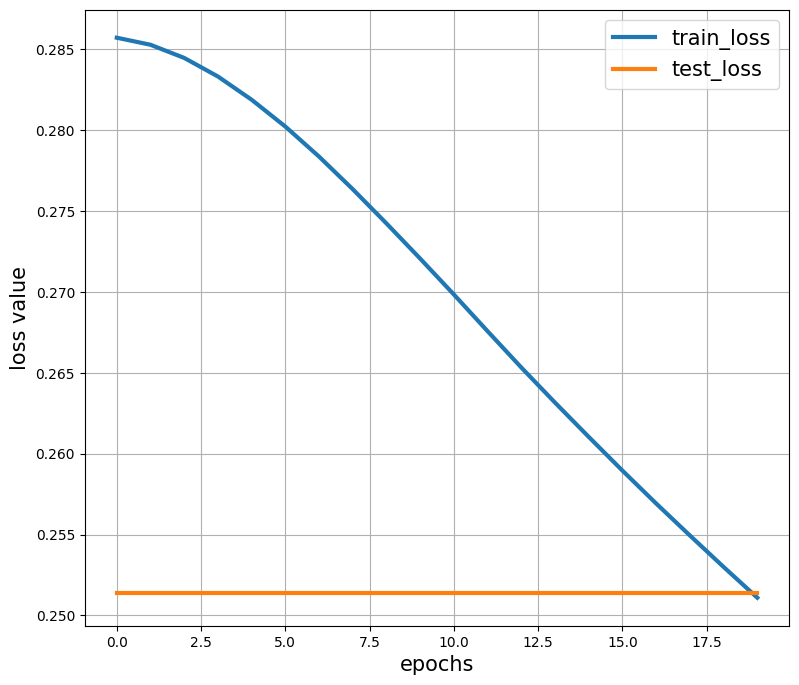

In [11]:
numpyNN.plot_loss(logs)

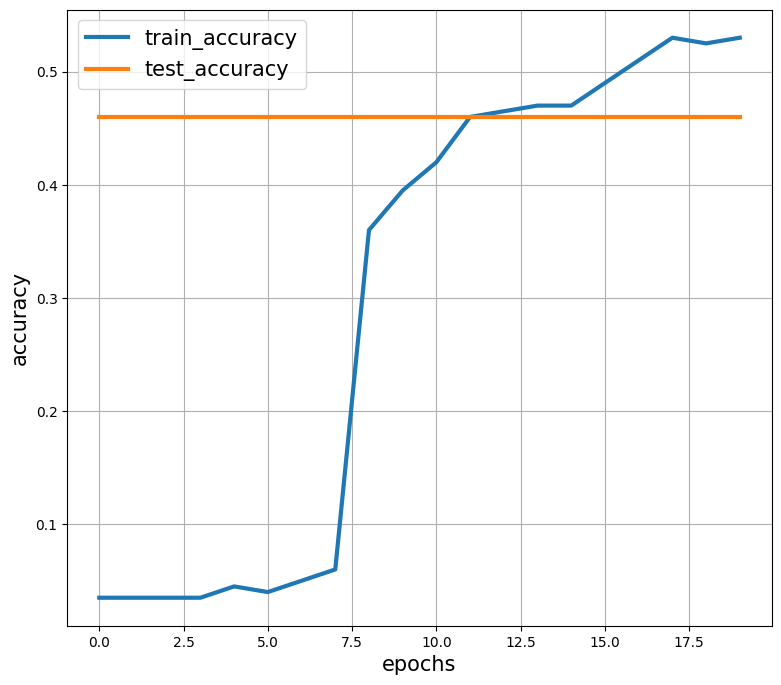

In [12]:
numpyNN.plot_accuracy(logs)

In [13]:

def plot_decision_boundary(X, y, model, boundry_level=None):
    """
    Plots the decision boundary for the model prediction
    :param X: input data
    :param y: true labels
    :param model: your MLP model
    :boundry_level: Determines the number and positions of the contour lines / regions.
    :return:
    """
    print(X.shape)
    print(y.shape)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    def predict(X):
        # Assuming your model's forward method returns the class probabilities
        # and you're interested in the class with the highest probability
        y_pred = model.forward(X)
        # Convert probabilities to class labels (assuming binary classification)
        return np.argmax(y_pred, axis=1)


    # Use the predict function as pred_fn
    Z = predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.7, levels=boundry_level, cmap='viridis_r')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.scatter(X[:, 0], X[:, 1], c=y.reshape(-1), alpha=0.7,s=50, cmap='viridis_r', edgecolor='k')

(200, 2)
(200, 1)


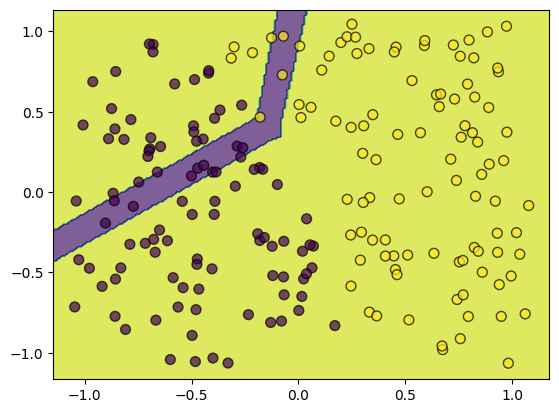

In [14]:
# predicted_labels = np.argmax(y_pred, axis=1)
plot_decision_boundary(x_train, y_train, mlp_test , boundry_level=None)

---

In [15]:

x_train, y_train, x_test, y_test = numpyNN.sample_data(data_name = 'linear-separable',nTrain=2, nTest=2)

In [16]:
dim_in, dim_out = x_train.shape[1], 2
hidden_neuron_list = [2,4]
activation_list = ['ReLU', 'ReLU', 'Sigmoid']
opt_init = None
opt_loss = L2Loss()
mlp = MLP(dim_in, dim_out, hidden_neuron_list, activation_list, opt_init)
opt_optim = SGD(lr_decay=1, decay_iter=30)

print(mlp.summary())

TypeError: SGD.__init__() missing 1 required positional argument: 'model'

In [ ]:
print(mlp.get_parameters())

[{'params': array([[ 0.81526991,  0.22909795],
       [-1.02617878,  0.47752547]]), 'grad': 0.0}, {'params': array([[0., 0.]]), 'grad': 0.0}, {'params': array([[ 1.29269823, -0.73145824, -1.60540226,  0.98947618],
       [ 0.11081461, -0.38093141,  0.11495917,  0.34531264]]), 'grad': 0.0}, {'params': array([[0., 0., 0., 0.]]), 'grad': 0.0}, {'params': array([[-1.73495876,  1.65835111],
       [ 2.29977152, -0.47113526],
       [ 1.26271548, -1.17051545],
       [ 1.0657892 , -0.69993739]]), 'grad': 0.0}, {'params': array([[0., 0.]]), 'grad': 0.0}]


In [ ]:
y_pred = mlp.forward(x_train)
y_train = one_hot_encoding(y_train)
loss = opt_loss.forward(y_pred, y_train)

In [ ]:
y_pred[1:4], y_train[1:4], loss[1:4]

(array([[0.49148908, 0.51897857]]), array([[1., 0.]]), array([0.26396106]))

In [ ]:
predicted_labels = np.argmax(y_pred, axis=1)
true_labels = np.argmax(y_train, axis=1)  # Adjust this line if train_y is not one-hot encoded
accuracy = np.sum(predicted_labels == true_labels) / len(x_train)
print(accuracy)

0.0


In [ ]:
print("Before backward:", mlp.layers[0].parameters[0]['params'].mean())

Before backward: 0.12392863696006


In [ ]:
dLdZ = opt_loss.backward(y_pred, y_train)
dLdZ[1:10]

array([[-0.50851092,  0.51897857]])

In [ ]:
dLdZ.shape

(2, 2)

In [ ]:
mlp.get_parameters()

[{'params': array([[ 0.81526991,  0.22909795],
         [-1.02617878,  0.47752547]]),
  'grad': 0.0},
 {'params': array([[0., 0.]]), 'grad': 0.0},
 {'params': array([[ 1.29269823, -0.73145824, -1.60540226,  0.98947618],
         [ 0.11081461, -0.38093141,  0.11495917,  0.34531264]]),
  'grad': 0.0},
 {'params': array([[0., 0., 0., 0.]]), 'grad': 0.0},
 {'params': array([[-1.73495876,  1.65835111],
         [ 2.29977152, -0.47113526],
         [ 1.26271548, -1.17051545],
         [ 1.0657892 , -0.69993739]]),
  'grad': 0.0},
 {'params': array([[0., 0.]]), 'grad': 0.0}]

In [ ]:
mlp.backward(dLdZ)

array([[ 0.81526991, -1.02617878],
       [ 1.04436786, -0.54865331]])

In [ ]:
mlp.get_parameters()

[{'params': array([[ 0.81526991,  0.22909795],
         [-1.02617878,  0.47752547]]),
  'grad': array([[0.78397459, 0.40706704],
         [0.05325339, 0.26387176]])},
 {'params': array([[0., 0.]]), 'grad': array([[2, 1]])},
 {'params': array([[ 1.29269823, -0.73145824, -1.60540226,  0.98947618],
         [ 0.11081461, -0.38093141,  0.11495917,  0.34531264]]),
  'grad': array([[0.58450339, 0.        , 0.        , 0.58450339],
         [0.21926371, 0.        , 0.        , 0.21926371]])},
 {'params': array([[0., 0., 0., 0.]]), 'grad': array([[2, 0, 0, 2]])},
 {'params': array([[-1.73495876,  1.65835111],
         [ 2.29977152, -0.47113526],
         [ 1.26271548, -1.17051545],
         [ 1.0657892 , -0.69993739]]),
  'grad': array([[-0.11319316,  0.1134724 ],
         [ 0.        ,  0.        ],
         [ 0.        ,  0.        ],
         [-0.09390094,  0.09425557]])},
 {'params': array([[0., 0.]]), 'grad': array([[-0.2749868 ,  0.27748981]])}]

In [ ]:
print("Before optimization:", mlp.layers[0].parameters[0]['params'].mean())

Before optimization: 0.12392863696006


In [ ]:
opt_optim.step(mlp.get_parameters())

0 Initialized v
1 v
1 v
1 v
1 v
1 v
1 v


In [ ]:
mlp.get_parameters()

[{'params': array([[ 0.80743016,  0.22502728],
         [-1.02671131,  0.47488675]]),
  'grad': array([[0.78397459, 0.40706704],
         [0.05325339, 0.26387176]])},
 {'params': array([[-0.02, -0.01]]), 'grad': array([[2, 1]])},
 {'params': array([[ 1.2868532 , -0.73145824, -1.60540226,  0.98363114],
         [ 0.10862197, -0.38093141,  0.11495917,  0.34312001]]),
  'grad': array([[0.58450339, 0.        , 0.        , 0.58450339],
         [0.21926371, 0.        , 0.        , 0.21926371]])},
 {'params': array([[-0.02,  0.  ,  0.  , -0.02]]),
  'grad': array([[2, 0, 0, 2]])},
 {'params': array([[-1.73382683,  1.65721638],
         [ 2.29977152, -0.47113526],
         [ 1.26271548, -1.17051545],
         [ 1.06672821, -0.70087994]]),
  'grad': array([[-0.11319316,  0.1134724 ],
         [ 0.        ,  0.        ],
         [ 0.        ,  0.        ],
         [-0.09390094,  0.09425557]])},
 {'params': array([[ 0.00274987, -0.0027749 ]]),
  'grad': array([[-0.2749868 ,  0.27748981]])}]

In [ ]:
print("After optimization:", mlp.layers[0].parameters[0]['params'].mean())

After optimization: 0.1201582200088189


In [ ]:
opt_optim.zero_grad(mlp.get_parameters())

In [ ]:
mlp.get_parameters()

[{'params': array([[ 0.80743016,  0.22502728],
         [-1.02671131,  0.47488675]]),
  'grad': array([[0., 0.],
         [0., 0.]])},
 {'params': array([[-0.02, -0.01]]), 'grad': array([[0, 0]])},
 {'params': array([[ 1.2868532 , -0.73145824, -1.60540226,  0.98363114],
         [ 0.10862197, -0.38093141,  0.11495917,  0.34312001]]),
  'grad': array([[0., 0., 0., 0.],
         [0., 0., 0., 0.]])},
 {'params': array([[-0.02,  0.  ,  0.  , -0.02]]),
  'grad': array([[0, 0, 0, 0]])},
 {'params': array([[-1.73382683,  1.65721638],
         [ 2.29977152, -0.47113526],
         [ 1.26271548, -1.17051545],
         [ 1.06672821, -0.70087994]]),
  'grad': array([[0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.]])},
 {'params': array([[ 0.00274987, -0.0027749 ]]), 'grad': array([[0., 0.]])}]

In [ ]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# class TorchMLP(nn.Module):
#     def __init__(self, input_dim, hidden_dims, output_dim):
#         super(TorchMLP, self).__init__()
#         # Define the first hidden layer
#         self.hidden1 = nn.Linear(input_dim, hidden_dims[0])
#         # Define the second hidden layer
#         self.hidden2 = nn.Linear(hidden_dims[0], hidden_dims[1])
#         # Define the output layer
#         self.output = nn.Linear(hidden_dims[1], output_dim)
    
#     def forward(self, x):
#         # Pass the input through the first hidden layer and apply ReLU
#         x = F.relu(self.hidden1(x))
#         # Pass the result through the second hidden layer and apply ReLU
#         x = F.relu(self.hidden2(x))
#         # Pass the result through the output layer and apply Softmax
#         # Note: Softmax is typically applied outside the model for numerical stability
#         x = self.output(x)
#         return x

# # Initialize the model
# input_dim = 2  # Assuming 2 features in the input data
# hidden_neuron_list = [2,3]
# output_dim = 2  # Output dimension for binary classification (use with softmax)
# model = TorchMLP(input_dim, hidden_neuron_list, output_dim)

# # Print the model summary
# print(model)

# # Calculate the number of parameters
# total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
# print(f"Total number of parameters: {total_params}")


In [ ]:
# y_train = one_hot_encoding(y_train)
dim_in, dim_out = x_train.shape[1], 2
hidden_neuron_list = [2,2]
activation_list = ['Tanh', 'ReLU', 'Sigmoid']
opt_init = None
opt_loss = CrossEntropyLoss()
mlp = MLP(dim_in, dim_out, hidden_neuron_list, activation_list, opt_init)
opt_optim = Adam(lr_decay=1, decay_iter=30)

In [ ]:
for i in range(3):
    print('Epoch', i)
    print(mlp.get_parameters())
    y_pred = mlp.forward(x_train)
    loss = opt_loss.forward(y_pred, y_train)
    # y_pred[1:4], y_train[1:4], loss[1:4]
    predicted_labels = np.argmax(y_pred, axis=1)
    true_labels = np.argmax(y_train, axis=1)  # Adjust this line if train_y is not one-hot encoded
    accuracy = np.sum(predicted_labels == true_labels) / len(x_train)
    print(accuracy)
    print("Before backward:", mlp.layers[0].parameters[0]['params'].mean())
    print(mlp.get_parameters())

    dLdZ = opt_loss.backward(y_pred, y_train)
    dLdZ[1:10]
    dLdZ.shape
    print("After backward:", mlp.layers[0].parameters[0]['params'].mean())
    print(mlp.get_parameters())
    mlp.backward(dLdZ)
    print("Before optimization:", mlp.layers[0].parameters[0]['params'].mean())
    opt_optim.step(mlp.get_parameters())
    print("After optimization:", mlp.layers[0].parameters[0]['params'].mean())
    opt_optim.zero_grad(mlp.get_parameters())
    print("After 0:", mlp.layers[0].parameters[0]['params'].mean())
    print(mlp.get_parameters())

Epoch 0
[{'params': array([[-0.99838235, -0.3676376 ],
       [ 1.73719932,  0.59361275]]), 'grad': 0.0}, {'params': array([[0., 0.]]), 'grad': 0.0}, {'params': array([[-0.54236358, -1.71967238],
       [-0.57890879,  1.42694855]]), 'grad': 0.0}, {'params': array([[0., 0.]]), 'grad': 0.0}, {'params': array([[0.27699691, 0.78966713],
       [0.32207411, 0.70039238]]), 'grad': 0.0}, {'params': array([[0., 0.]]), 'grad': 0.0}]
0.5
Before backward: 0.24119802808082583
[{'params': array([[-0.99838235, -0.3676376 ],
       [ 1.73719932,  0.59361275]]), 'grad': 0.0}, {'params': array([[0., 0.]]), 'grad': 0.0}, {'params': array([[-0.54236358, -1.71967238],
       [-0.57890879,  1.42694855]]), 'grad': 0.0}, {'params': array([[0., 0.]]), 'grad': 0.0}, {'params': array([[0.27699691, 0.78966713],
       [0.32207411, 0.70039238]]), 'grad': 0.0}, {'params': array([[0., 0.]]), 'grad': 0.0}]
After backward: 0.24119802808082583
[{'params': array([[-0.99838235, -0.3676376 ],
       [ 1.73719932,  0.5936